# Deep Learning and Image Augmentation with multiprocessing

In [1]:
import numpy as np
import pandas as pd
import keras as K
import matplotlib.pyplot as plt
import multiprocessing
import time
import collections
import sys
import signal

%matplotlib inline

Using TensorFlow backend.


In [2]:
import tools.image as T
try:
    from importlib import reload
    reload(T)
except:
    reload(T)

helper functions

In [3]:
def preprocess_img(img):
    img = img.astype(np.float32) / 255.0
    img -= 0.5
    return img * 2

In [4]:
def plot_images(img_gen, title):
    fig, ax = plt.subplots(6, 6, figsize=(10, 10))
    plt.suptitle(title, size=32)
    plt.setp(ax, xticks=[], yticks=[])
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    for (imgs, labels) in img_gen:
        for i in range(6):
            for j in range(6):
                if i*6 + j < 32:
                    ax[i][j].imshow(imgs[i*6 + j])
        break    

## Image Augumentation with CIFAR10 Dataset

In [5]:
from keras.datasets.cifar10 import load_data
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = load_data()

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

4 process, duration: 0.0404160022736


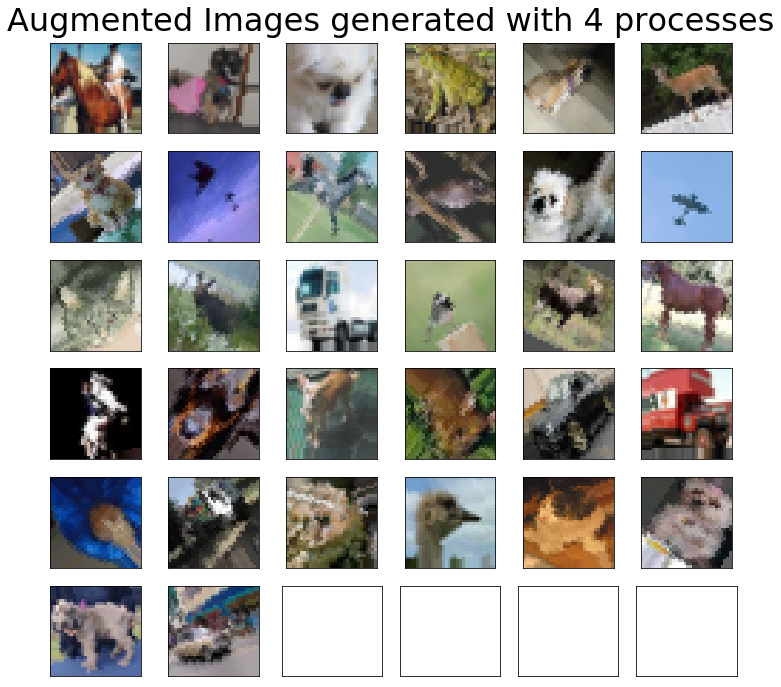

In [6]:
#imagedatagenerator with pool
try:
    pool.terminate()
except:
    pass
n_process = 4
    
pool = multiprocessing.Pool(processes=n_process)
start = time.time()
gen = T.ImageDataGenerator(
     featurewise_center=False,
     samplewise_center=False,
     featurewise_std_normalization=False,
     samplewise_std_normalization=False,
     zca_whitening=False,
     rotation_range=45,
     width_shift_range=.1,
     height_shift_range=.1,
     shear_range=0.,
     zoom_range=0,
     channel_shift_range=0,
     fill_mode='nearest',
     cval=0.,
     horizontal_flip=True,
     vertical_flip=False,
     rescale=1/255.,
     dim_ordering='default',
     pool=pool
)

gen.fit(X_train)
X_train_aug = gen.flow(X_train, y_train_cat, seed=0)

print('{} process, duration: {}'.format(4, time.time() - start))
plot_images(X_train_aug, 'Augmented Images generated with {} processes'.format(n_process))

pool.terminate()

In [7]:
durs = collections.defaultdict(list)
num_cores = 2
try:
    num_cores = multiprocessing.cpu_count()
except:
    pass

for j in range(10):
    print('Round', j)
    
    for num_p in range(0, num_cores + 1):
        pool = None
        if num_p > 0:
            pool = multiprocessing.Pool(processes=num_p)
            
        start = time.time()
        gen = T.ImageDataGenerator(
             featurewise_center=False,
             samplewise_center=False,
             featurewise_std_normalization=False,
             samplewise_std_normalization=False,
             zca_whitening=False,
             rotation_range=45,
             width_shift_range=.1,
             height_shift_range=.1,
             shear_range=0.,
             zoom_range=0,
             channel_shift_range=0,
             fill_mode='nearest',
             cval=0.,
             horizontal_flip=True,
             vertical_flip=False,
             rescale=None,
             preprocessing_function=preprocess_img,
             dim_ordering='default',
             pool=pool
        )

        gen.fit(X_train)
        X_train_aug = gen.flow(X_train, y_train_cat, seed=0)

        for i, (imgs, labels) in enumerate(X_train_aug):
            if i == 1000:
                break

        dur = time.time() - start
        #print(num_p, dur)
        sys.stdout.write('{}: {} ... '.format(num_p, dur))
        sys.stdout.flush()
        
        durs[num_p].append(dur)

        if pool:
            pool.terminate()

('Round', 0)
0: 6.84576511383 ... 1: 9.6486890316 ... 2: 6.03799390793 ... 3: 4.88081693649 ... 4: 4.66870999336 ... 5: 3.70913481712 ... 6: 3.27630805969 ... 7: 3.48509907722 ... 8: 3.64657878876 ... 9: 3.74150896072 ... 10: 3.57441878319 ... 11: 3.60130214691 ... 12: 3.47499299049 ... ('Round', 1)
0: 6.75701498985 ... 1: 9.94960093498 ... 2: 5.64250087738 ... 3: 5.06900811195 ... 4: 4.61409282684 ... 5: 4.57506585121 ... 6: 3.48270392418 ... 7: 3.51494693756 ... 8: 3.88235402107 ... 9: 3.62926697731 ... 10: 3.91224503517 ... 11: 3.59025716782 ... 12: 3.5045068264 ... ('Round', 2)
0: 6.90472793579 ... 1: 9.55179905891 ... 2: 6.57418012619 ... 3: 5.2566280365 ... 4: 4.55560803413 ... 5: 4.45380306244 ... 6: 3.54513192177 ... 7: 3.21149206161 ... 8: 3.78789710999 ... 9: 3.67751908302 ... 10: 3.74882698059 ... 11: 3.98700881004 ... 12: 3.64187002182 ... ('Round', 3)
0: 6.82807612419 ... 1: 9.48674917221 ... 2: 5.57596802711 ... 3: 4.74470591545 ... 4: 4.18711090088 ... 5: 3.89195489883 .

In [8]:
df = pd.DataFrame(durs)
df

0          1         2         3         4         5         6   \
0  6.845765   9.648689  6.037994  4.880817  4.668710  3.709135  3.276308   
1  6.757015   9.949601  5.642501  5.069008  4.614093  4.575066  3.482704   
2  6.904728   9.551799  6.574180  5.256628  4.555608  4.453803  3.545132   
3  6.828076   9.486749  5.575968  4.744706  4.187111  3.891955  3.229246   
4  6.737044   9.215629  6.235662  5.135804  4.712292  3.352834  3.248463   
5  6.752459  10.791286  6.798783  4.677954  4.769213  3.997663  3.451774   
6  6.949735   9.722293  6.766982  5.287929  4.446344  4.342741  3.949049   
7  6.715224  10.202680  6.041754  5.208362  4.356538  4.395603  3.743921   
8  6.835559   9.497898  5.336400  5.419732  4.429428  4.306041  3.228107   
9  6.740575  10.335840  6.028103  5.419689  4.690012  3.606063  3.843490   

         7         8         9         10        11        12  
0  3.485099  3.646579  3.741509  3.574419  3.601302  3.474993  
1  3.514947  3.882354  3.629267  3.912245  3.590257  3.504507  
2  3.211492  3.787897  3.677519  3.748827  3.987009  3.641870  
3  3.176229  4.075233  3.599547  3.736613  3.524895  3.824514  
4  3.790106  3.742944  3.760956  3.714206  3.541785  3.720247  
5  3.302690  3.927679  3.693424  3.524806  3.469980  3.605312  
6  3.348857  3.694885  3.879952  3.782795  3.497521  3.563512  
7  3.192625  3.898745  3.413011  3.791242  3.904498  3.742718  
8  3.240051  3.613944  3.509497  3.622077  3.840339  3.853116  
9  3.672175  4.025228  3.748878  4.080992  3.810789  3.463591

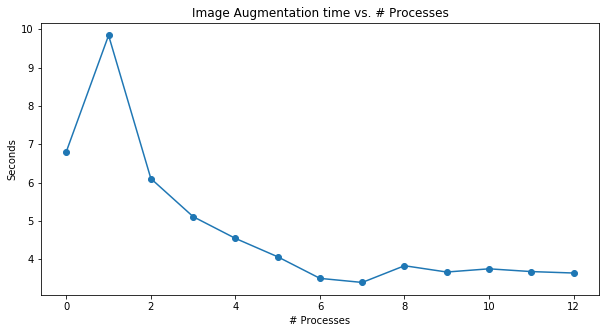

In [9]:
df_mean = pd.DataFrame(df.mean(axis=0))
plt.figure(figsize=(10,5))
plt.plot(df_mean, marker='o')
plt.xlabel('# Processes')
plt.ylabel('Seconds')
plt.title('Image Augmentation time vs. # Processes')

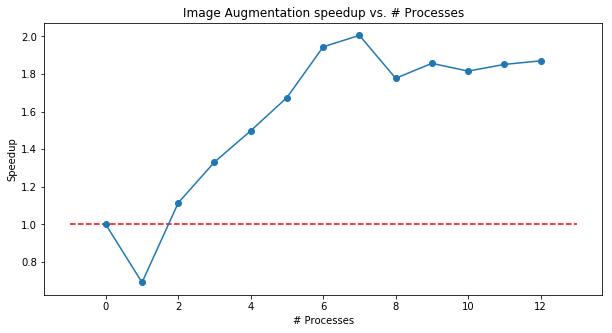

In [10]:
speedups = 1 / (df_mean / df_mean[0][0])
plt.figure(figsize=(10,5))
plt.plot(speedups, marker='o')
plt.xlabel('# Processes')
plt.ylabel('Speedup')
plt.hlines(1, -1, df_mean.shape[0], colors='red', linestyles='dashed')
plt.title('Image Augmentation speedup vs. # Processes')

In [11]:
best_ix = np.argmax(speedups.values)
print('Best speedup: {0:.2f}x with {1} processes.'.format(speedups.values[best_ix][0], best_ix))

Best speedup: 2.01x with 7 processes.


## CIFAR10 with Image Generation and GPU Training

In [12]:
import tools.sysmonitor as SM
reload(SM)

<module 'tools.sysmonitor' from 'tools/sysmonitor.pyc'>

In [58]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, 3, 3, border_mode='same',
                        input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_8 (Convolution2D)  (None, 32, 32, 32)    896         convolution2d_input_3[0][0]      
____________________________________________________________________________________________________
activation_12 (Activation)       (None, 32, 32, 32)    0           convolution2d_8[0][0]            
____________________________________________________________________________________________________
convolution2d_9 (Convolution2D)  (None, 30, 30, 32)    9248        activation_12[0][0]              
____________________________________________________________________________________________________
activation_13 (Activation)       (None, 30, 30, 32)    0           convolution2d_9[0][0]            
___________________________________________________________________________________________

In [59]:
pool = None
def init_worker():
    signal.signal(signal.SIGINT, signal.SIG_IGN)

In [60]:
def setup_generator(processes=None, batch_size=32):
    global pool
    try:
        pool.terminate()
    except:
        pass

    if processes: 
        pool = multiprocessing.Pool(processes=processes, initializer=init_worker)
    else:
        pool = None

    gen = T.ImageDataGenerator(
         featurewise_center=False,
         samplewise_center=False,
         featurewise_std_normalization=False,
         samplewise_std_normalization=False,
         zca_whitening=False,
         rotation_range=45,
         width_shift_range=.1,
         height_shift_range=.1,
         shear_range=0.,
         zoom_range=[.8, 1],
         channel_shift_range=20,
         fill_mode='nearest',
         cval=0.,
         horizontal_flip=True,
         vertical_flip=False,
         rescale=None,
         preprocessing_function=preprocess_img,
         dim_ordering='default',
         pool=pool
    )
    test_gen = T.ImageDataGenerator(
        preprocessing_function=preprocess_img,
        pool=pool
    )
    
    gen.fit(X_train)
    test_gen.fit(X_train)
    
    X_train_aug = gen.flow(X_train, y_train_cat, seed=0, batch_size=batch_size)
    X_test_aug = test_gen.flow(X_test, y_test_cat, seed=0, batch_size=batch_size)
    
    return X_train_aug, X_test_aug

In [61]:
def run_benchmark(processes=None, batch_size=32, vert=True, plot=True):
    X_train_aug, X_test_aug = setup_generator(processes=processes, batch_size=batch_size)
    sys_mon = SM.SysMonitor()
    sys_mon.start()
    
    try:
        model.fit_generator(X_train_aug, samples_per_epoch=50000, nb_epoch=5, 
                        validation_data=X_test_aug, nb_val_samples=10000)
    except KeyboardInterrupt:
        print '\n\nTraining Interrupted\n'
        return None

    sys_mon.stop()
    
    title = None
    if not processes:
        title = '{0:.2f} seconds of computation, no multiprocessing, batch size = {1}'.format(sys_mon.duration, batch_size)
    else:
        title = '{0:.2f} seconds of computation, using {1} processes, batch size = {2}'.format(sys_mon.duration, processes, batch_size)
    
    if plot:
        sys_mon.plot(title, vert)
    
    if not processes:
        processes = 0
        
    return {
        'processes': processes,
        'batch_size': batch_size,
        'duration': sys_mon.duration,
        'title': title
    }

Scenarios with different parameters

In [19]:
runs = []

Epoch 1/5
50000/50000 [==============================] - 22s - loss: 1.1598 - acc: 0.5941 - val_loss: 0.8368 - val_acc: 0.7077
Epoch 2/5
50000/50000 [==============================] - 21s - loss: 1.1457 - acc: 0.6003 - val_loss: 0.8865 - val_acc: 0.6907
Epoch 3/5
50000/50000 [==============================] - 21s - loss: 1.1311 - acc: 0.6031 - val_loss: 0.8255 - val_acc: 0.7190
Epoch 4/5
50000/50000 [==============================] - 21s - loss: 1.1232 - acc: 0.6060 - val_loss: 0.8367 - val_acc: 0.7142
Epoch 5/5
50000/50000 [==============================] - 22s - loss: 1.1075 - acc: 0.6116 - val_loss: 0.8358 - val_acc: 0.7054


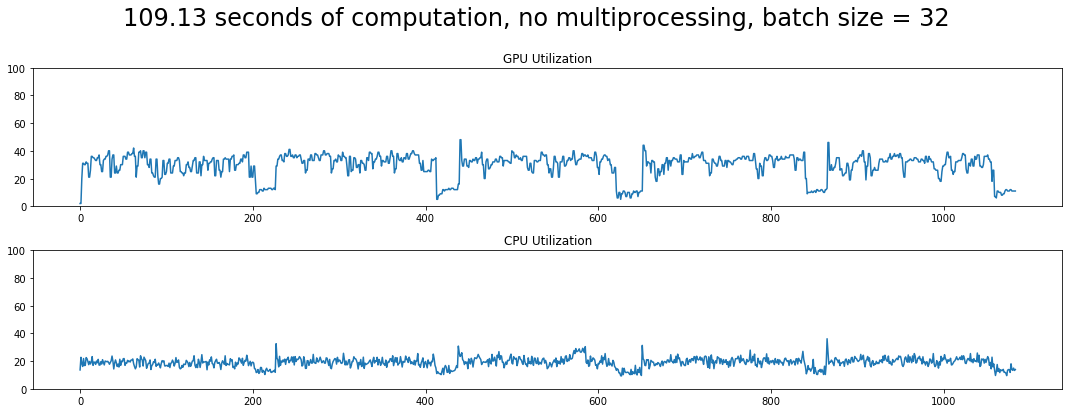

In [20]:
runs.append(run_benchmark(processes=None, batch_size=32))

Epoch 1/5
50000/50000 [==============================] - 11s - loss: 1.0912 - acc: 0.6165 - val_loss: 0.8329 - val_acc: 0.7103
Epoch 2/5
50000/50000 [==============================] - 11s - loss: 1.0838 - acc: 0.6232 - val_loss: 0.8299 - val_acc: 0.7053
Epoch 3/5
50000/50000 [==============================] - 11s - loss: 1.0736 - acc: 0.6245 - val_loss: 0.8385 - val_acc: 0.7092
Epoch 4/5
50000/50000 [==============================] - 11s - loss: 1.0671 - acc: 0.6258 - val_loss: 0.7994 - val_acc: 0.7238
Epoch 5/5
50000/50000 [==============================] - 11s - loss: 1.0670 - acc: 0.6283 - val_loss: 0.8347 - val_acc: 0.7133


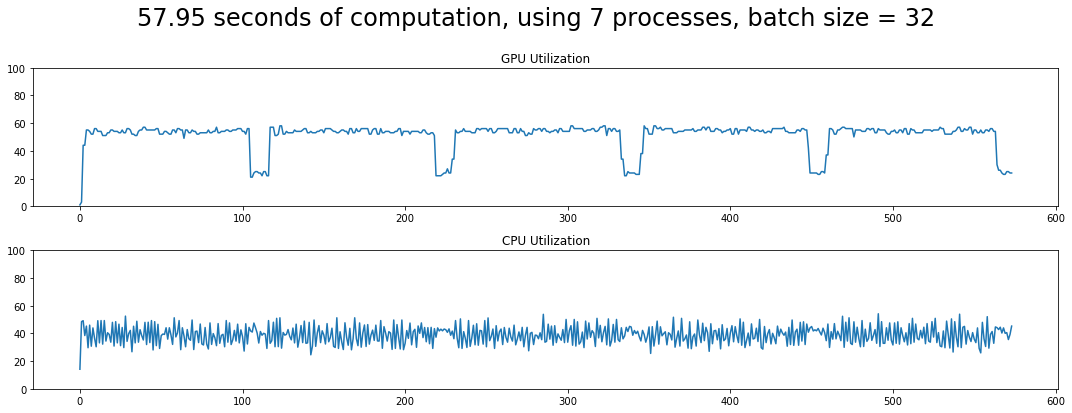

In [21]:
runs.append(run_benchmark(processes=7, batch_size=32))

In [22]:
runs[0]['duration'] / runs[1]['duration']

1.8832975152491378

 **1.8x speedup by using 7 processes**

Epoch 1/5
50000/50000 [==============================] - 19s - loss: 1.0319 - acc: 0.6400 - val_loss: 0.7463 - val_acc: 0.7389
Epoch 2/5
50000/50000 [==============================] - 17s - loss: 1.0013 - acc: 0.6495 - val_loss: 0.7436 - val_acc: 0.7416
Epoch 3/5
50000/50000 [==============================] - 17s - loss: 0.9910 - acc: 0.6537 - val_loss: 0.7253 - val_acc: 0.7484
Epoch 4/5
50000/50000 [==============================] - 17s - loss: 0.9824 - acc: 0.6582 - val_loss: 0.7271 - val_acc: 0.7499
Epoch 5/5
50000/50000 [==============================] - 17s - loss: 0.9752 - acc: 0.6600 - val_loss: 0.6967 - val_acc: 0.7607


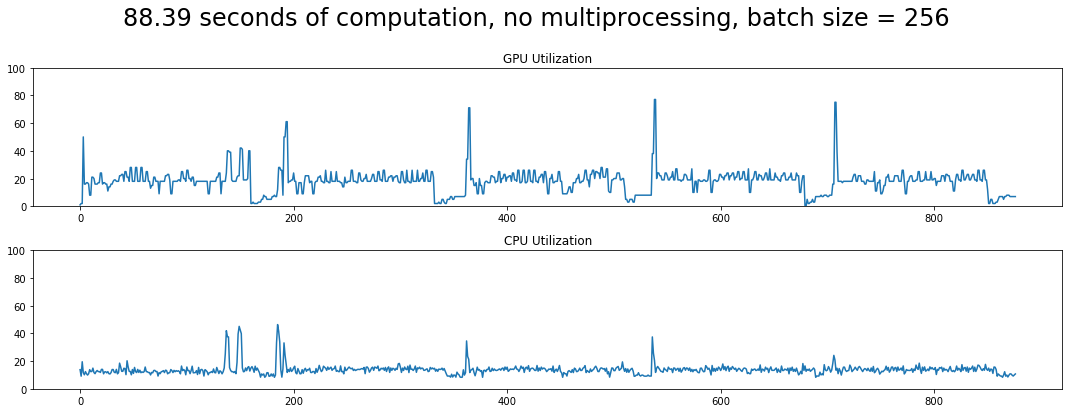

In [23]:
runs.append(run_benchmark(processes=None, batch_size=256))

Epoch 1/5
50000/50000 [==============================] - 5s - loss: 0.9585 - acc: 0.6660 - val_loss: 0.7220 - val_acc: 0.7495
Epoch 2/5
50000/50000 [==============================] - 5s - loss: 0.9553 - acc: 0.6671 - val_loss: 0.7071 - val_acc: 0.7546
Epoch 3/5
50000/50000 [==============================] - 5s - loss: 0.9502 - acc: 0.6690 - val_loss: 0.6920 - val_acc: 0.7640
Epoch 4/5
50000/50000 [==============================] - 5s - loss: 0.9525 - acc: 0.6687 - val_loss: 0.7103 - val_acc: 0.7558
Epoch 5/5
50000/50000 [==============================] - 5s - loss: 0.9452 - acc: 0.6713 - val_loss: 0.6999 - val_acc: 0.7565


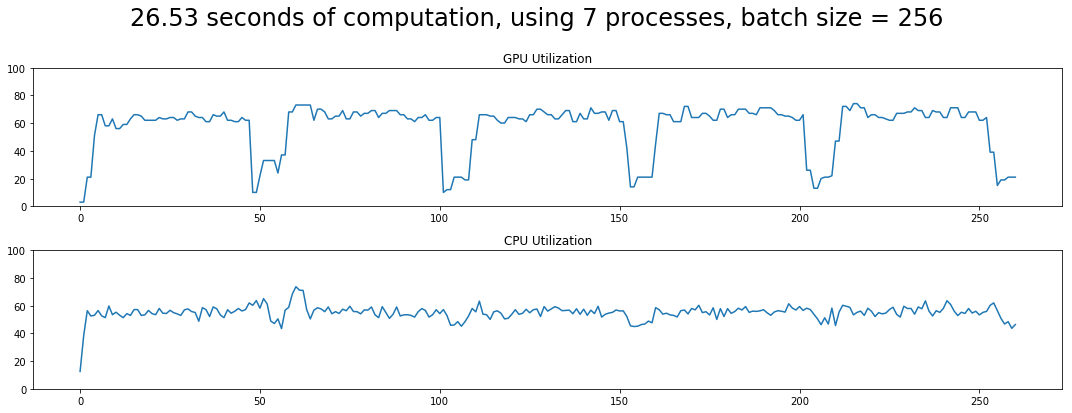

In [24]:
runs.append(run_benchmark(processes=7, batch_size=256))

In [25]:
runs[2]['duration'] / runs[3]['duration']

3.3318531284663795

With a batch size of 256, we get an **even larger speedup of 3.3x**

Epoch 1/5
50000/50000 [==============================] - 18s - loss: 0.9383 - acc: 0.6709 - val_loss: 0.6876 - val_acc: 0.7634
Epoch 2/5
50000/50000 [==============================] - 15s - loss: 0.9310 - acc: 0.6733 - val_loss: 0.6851 - val_acc: 0.7626
Epoch 3/5
50000/50000 [==============================] - 16s - loss: 0.9226 - acc: 0.6794 - val_loss: 0.6783 - val_acc: 0.7701
Epoch 4/5
50000/50000 [==============================] - 15s - loss: 0.9230 - acc: 0.6785 - val_loss: 0.6884 - val_acc: 0.7651
Epoch 5/5
50000/50000 [==============================] - 15s - loss: 0.9152 - acc: 0.6809 - val_loss: 0.6682 - val_acc: 0.7695


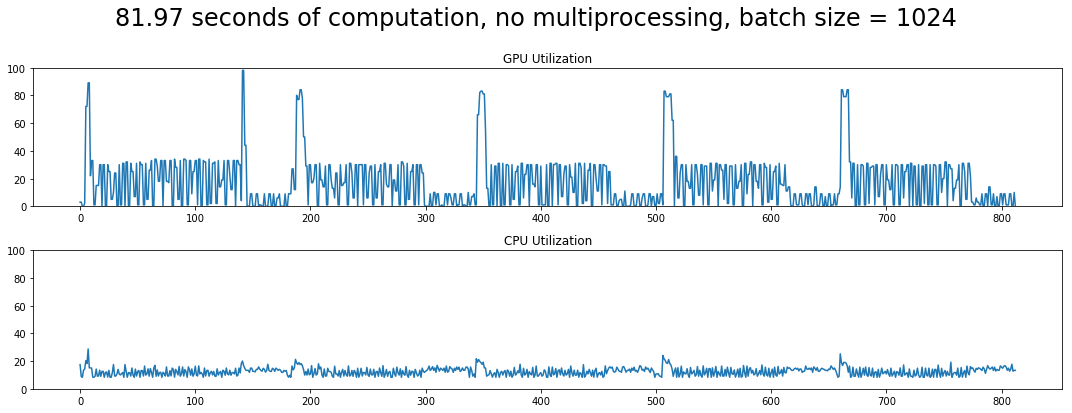

In [26]:
runs.append(run_benchmark(processes=None, batch_size=1024))

Epoch 1/5
50000/50000 [==============================] - 5s - loss: 0.9137 - acc: 0.6815 - val_loss: 0.6798 - val_acc: 0.7661
Epoch 2/5
50000/50000 [==============================] - 4s - loss: 0.9161 - acc: 0.6814 - val_loss: 0.6771 - val_acc: 0.7649
Epoch 3/5
50000/50000 [==============================] - 4s - loss: 0.9125 - acc: 0.6812 - val_loss: 0.6759 - val_acc: 0.7691
Epoch 4/5
50000/50000 [==============================] - 4s - loss: 0.9133 - acc: 0.6814 - val_loss: 0.6786 - val_acc: 0.7673
Epoch 5/5
50000/50000 [==============================] - 4s - loss: 0.9139 - acc: 0.6812 - val_loss: 0.6574 - val_acc: 0.7707


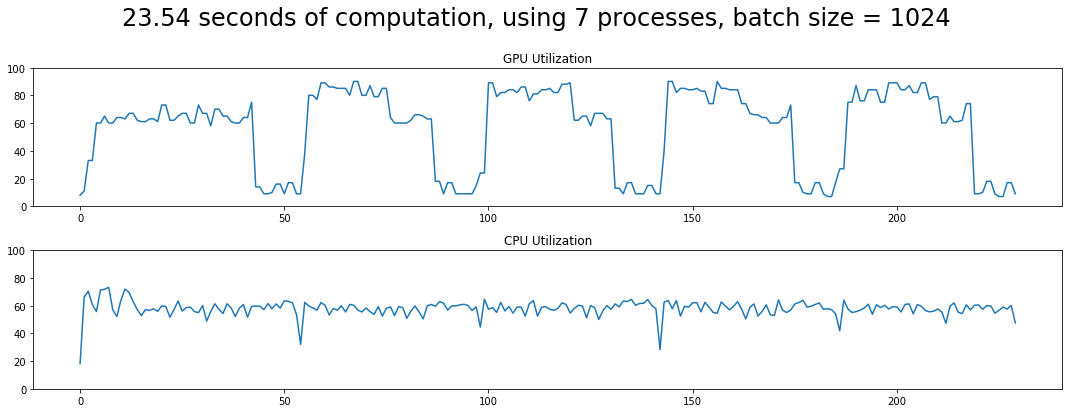

In [27]:
runs.append(run_benchmark(processes=7, batch_size=1024))

In [28]:
runs[4]['duration'] / runs[5]['duration']

3.4816410549495163

**a speedup of 3.48%**

Epoch 1/5
50000/50000 [==============================] - 19s - loss: 0.9059 - acc: 0.6812 - val_loss: 0.6704 - val_acc: 0.7696
Epoch 2/5
50000/50000 [==============================] - 16s - loss: 0.9116 - acc: 0.6829 - val_loss: 0.6654 - val_acc: 0.7666
Epoch 3/5
50000/50000 [==============================] - 14s - loss: 0.9002 - acc: 0.6867 - val_loss: 0.6626 - val_acc: 0.7719
Epoch 4/5
50000/50000 [==============================] - 16s - loss: 0.8984 - acc: 0.6863 - val_loss: 0.6678 - val_acc: 0.7688
Epoch 5/5
50000/50000 [==============================] - 15s - loss: 0.9041 - acc: 0.6847 - val_loss: 0.6647 - val_acc: 0.7663


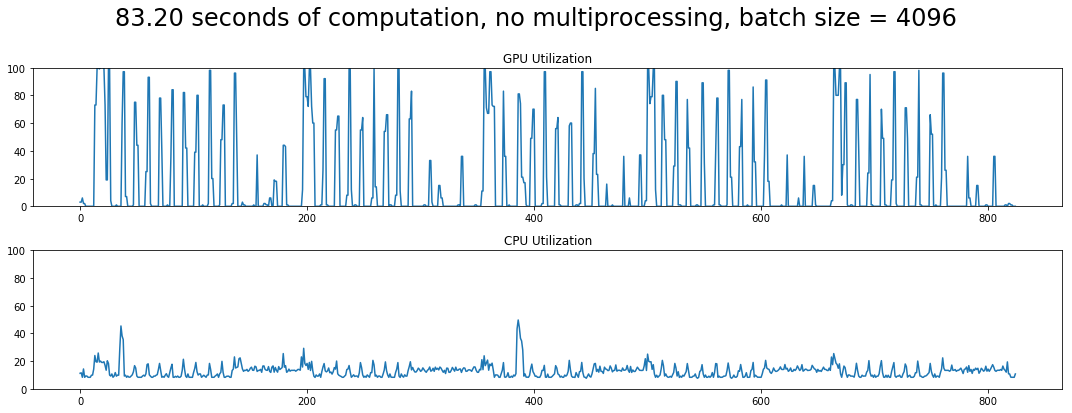

In [29]:
runs.append(run_benchmark(processes=None, batch_size=4096))

Epoch 1/5
50000/50000 [==============================] - 6s - loss: 0.9057 - acc: 0.6823 - val_loss: 0.6678 - val_acc: 0.7680
Epoch 2/5
50000/50000 [==============================] - 4s - loss: 0.9003 - acc: 0.6881 - val_loss: 0.6596 - val_acc: 0.7687
Epoch 3/5
50000/50000 [==============================] - 4s - loss: 0.8993 - acc: 0.6866 - val_loss: 0.6560 - val_acc: 0.7734
Epoch 4/5
50000/50000 [==============================] - 4s - loss: 0.9034 - acc: 0.6857 - val_loss: 0.6641 - val_acc: 0.7713
Epoch 5/5
50000/50000 [==============================] - 4s - loss: 0.9023 - acc: 0.6862 - val_loss: 0.6670 - val_acc: 0.7653


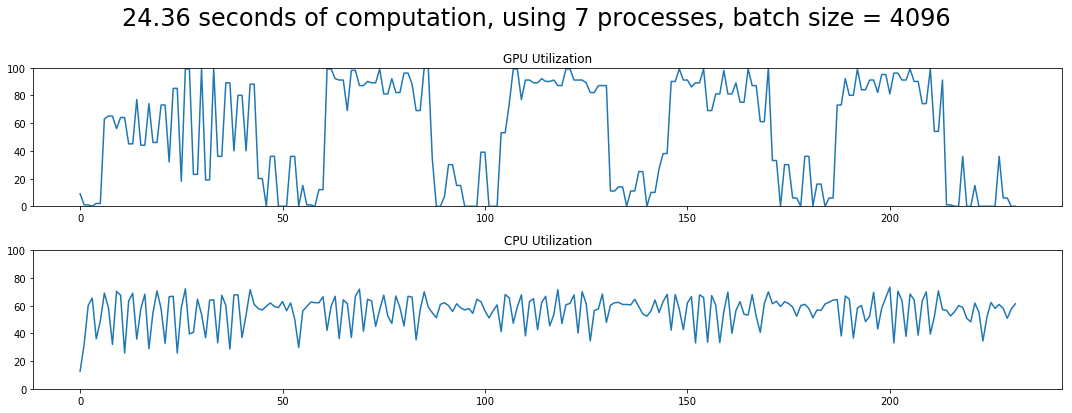

In [30]:
runs.append(run_benchmark(processes=7, batch_size=4096))

In [31]:
runs[6]['duration'] / runs[7]['duration']

3.4145451599892525

In [32]:
processes_counts = [None]
processes_counts.extend(range(1, 13))

results = []

for pc in processes_counts:
    print('process count', pc)
    results.append(run_benchmark(processes=pc, batch_size=4096, plot=False))

('process count', None)
Epoch 1/5
50000/50000 [==============================] - 19s - loss: 0.8994 - acc: 0.6885 - val_loss: 0.6619 - val_acc: 0.7704
Epoch 2/5
50000/50000 [==============================] - 15s - loss: 0.9035 - acc: 0.6864 - val_loss: 0.6609 - val_acc: 0.7706
Epoch 3/5
50000/50000 [==============================] - 15s - loss: 0.8930 - acc: 0.6883 - val_loss: 0.6613 - val_acc: 0.7730
Epoch 4/5
50000/50000 [==============================] - 17s - loss: 0.8894 - acc: 0.6879 - val_loss: 0.6648 - val_acc: 0.7705
Epoch 5/5
50000/50000 [==============================] - 14s - loss: 0.8942 - acc: 0.6870 - val_loss: 0.6639 - val_acc: 0.7706
('process count', 1)
Epoch 1/5
50000/50000 [==============================] - 26s - loss: 0.8941 - acc: 0.6873 - val_loss: 0.6590 - val_acc: 0.7727
Epoch 2/5
50000/50000 [==============================] - 19s - loss: 0.8953 - acc: 0.6900 - val_loss: 0.6597 - val_acc: 0.7690
Epoch 3/5
50000/50000 [==============================] - 18s - los

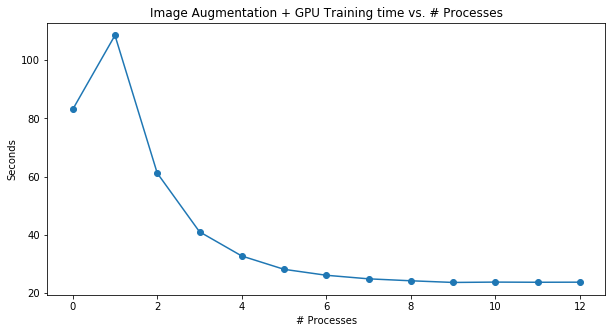

In [33]:
durs_4096 = pd.DataFrame([x['duration'] for x in results])
plt.figure(figsize=(10,5))
plt.plot(durs_4096, marker='o')
plt.xlabel('# Processes')
plt.ylabel('Seconds')
plt.title('Image Augmentation + GPU Training time vs. # Processes')

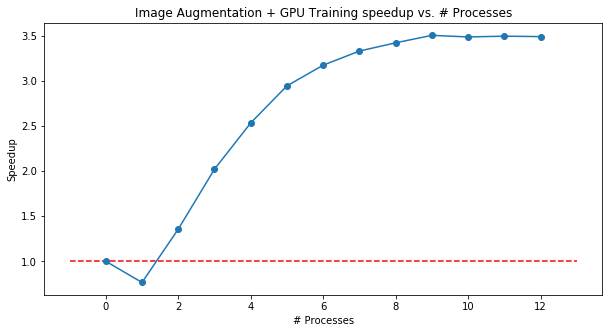

In [34]:
speedups_4096 = 1 / (durs_4096 / durs_4096.ix[0])

plt.figure(figsize=(10,5))
plt.plot(speedups_4096, marker='o')
plt.xlabel('# Processes')
plt.ylabel('Speedup')
plt.hlines(1, -1, speedups_4096.shape[0], colors='red', linestyles='dashed')
plt.title('Image Augmentation + GPU Training speedup vs. # Processes')

In [35]:
best_ix = np.argmax(speedups_4096.values)
print('Best speedup: {0:.2f}x with {1} processes.'.format(speedups_4096.values[best_ix][0], best_ix))

Best speedup: 3.51x with 9 processes.


## Benchmark: Dogs vs. Cats - On Disk Performance, Image Generation witih GPU Training

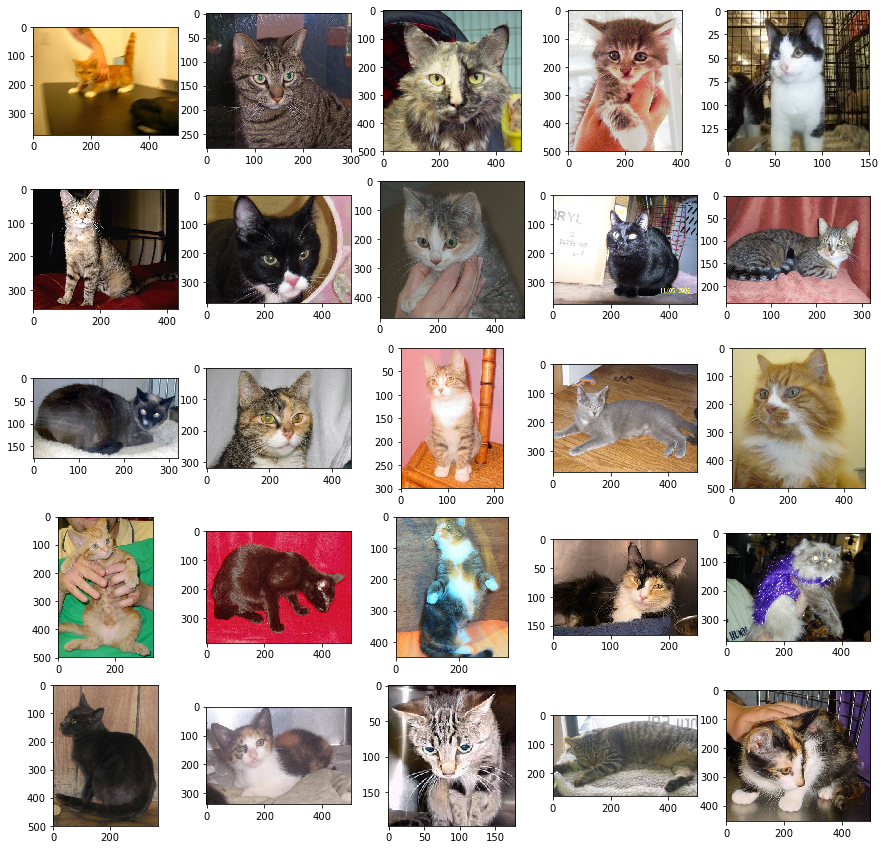

In [36]:
import os

paths = sorted(os.listdir('./data/train/cat'))

fig, ax = plt.subplots(5, 5, figsize=(15, 15))
for i in range(5):
    for j in range(5):
        ix = i*5 + j
        img = plt.imread('./data/train/cat/' + paths[ix])
        ax[i][j].imshow(img)


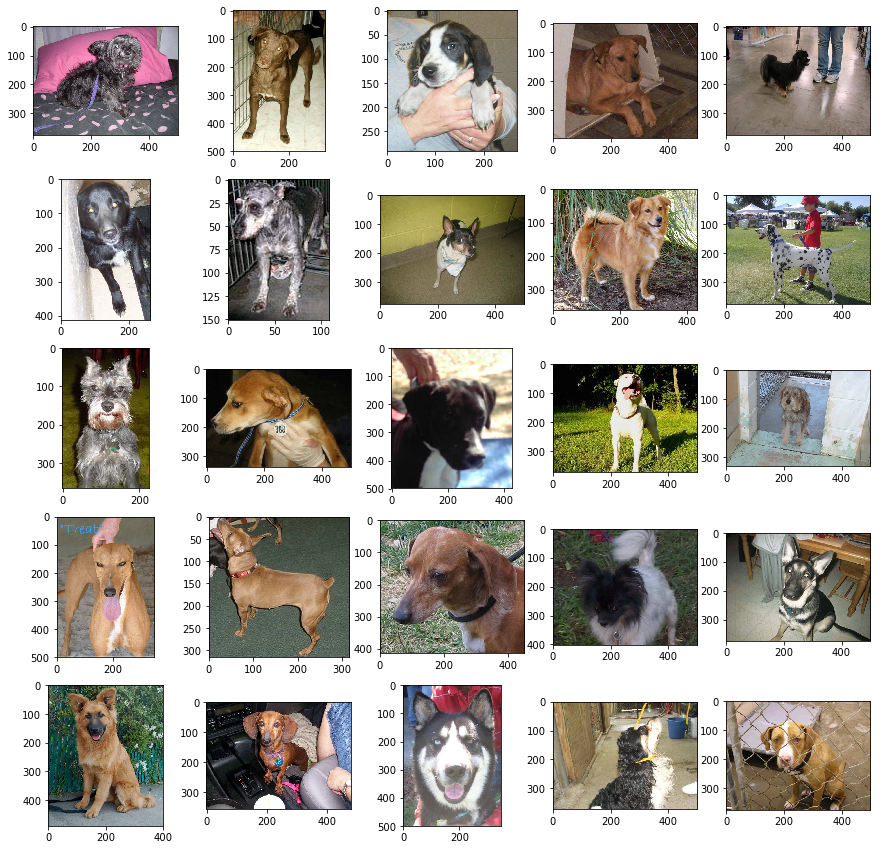

In [37]:
paths = sorted(os.listdir('./data/train/dog'))

fig, ax = plt.subplots(5, 5, figsize=(15, 15))
for i in range(5):
    for j in range(5):
        ix = i*5 + j
        img = plt.imread('./data/train/dog/' + paths[ix])
        ax[i][j].imshow(img)


Found 22778 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.


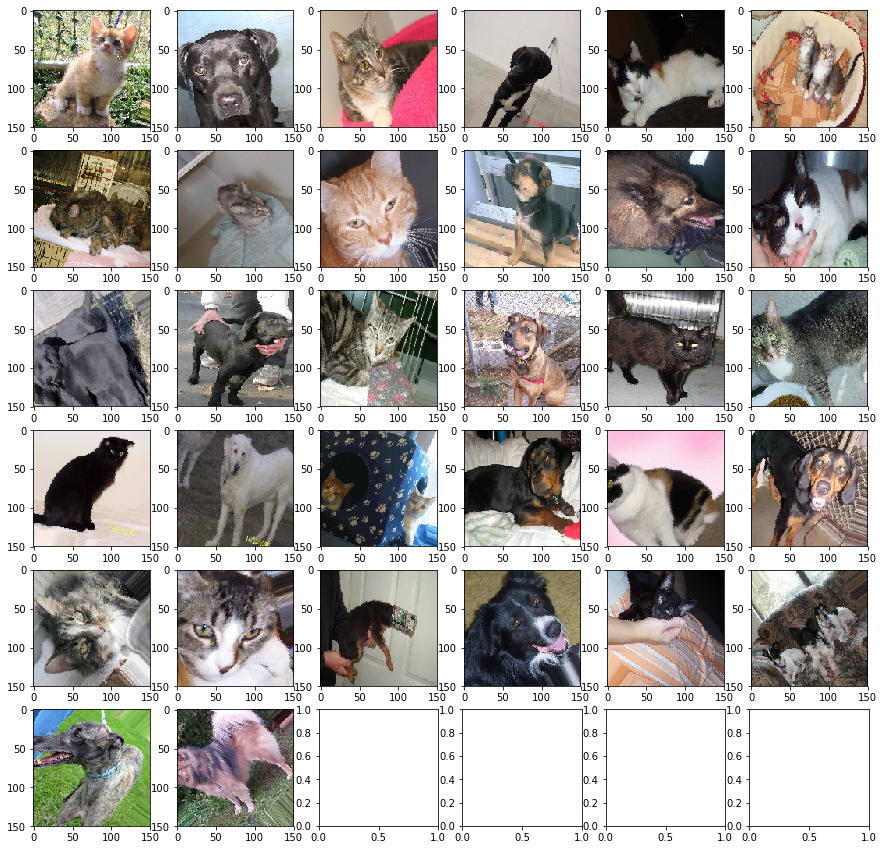

In [38]:
gen = T.ImageDataGenerator(
     featurewise_center=False,
     samplewise_center=False,
     featurewise_std_normalization=False,
     samplewise_std_normalization=False,
     zca_whitening=False,
     rotation_range=45,
     width_shift_range=.1,
     height_shift_range=.1,
     shear_range=0.,
     zoom_range=[.8, 1],
     channel_shift_range=0,
     fill_mode='nearest',
     cval=0.,
     horizontal_flip=True,
     vertical_flip=False,
     rescale=1/255.,
#      preprocessing_function=preprocess_img,
     #dim_ordering='default',
#      pool=None
)
test_gen = T.ImageDataGenerator(
    preprocessing_function=preprocess_img,
#     pool=None
)


train_generator = gen.flow_from_directory(
    'data/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

test_generator = gen.flow_from_directory(
    'data/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

fig, ax = plt.subplots(6, 6, figsize=(15, 15))
for (imgs, labels) in train_generator:
    for i in range(6):
        for j in range(6):
            if i*6 + j < 32:
                ax[i][j].imshow(imgs[i*6 + j])
    break


In [39]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(299, 299, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [40]:
def setup_cat_dog_generator(processes=None, batch_size=32):
    global pool
    try:
        pool.terminate()
    except:
        pass

    if processes: 
        pool = multiprocessing.Pool(processes=processes, initializer=init_worker)
    else:
        pool = None

    gen = T.ImageDataGenerator(
         featurewise_center=False,
         samplewise_center=False,
         featurewise_std_normalization=False,
         samplewise_std_normalization=False,
         zca_whitening=False,
         rotation_range=45,
         width_shift_range=.1,
         height_shift_range=.1,
         shear_range=0.,
         zoom_range=[.8, 1],
         channel_shift_range=20,
         fill_mode='nearest',
         cval=0.,
         horizontal_flip=True,
         vertical_flip=False,
         rescale=None,
         preprocessing_function=preprocess_img,
         dim_ordering='default',
         pool=pool
    )
    test_gen = T.ImageDataGenerator(
        preprocessing_function=preprocess_img,
        pool=pool
    )
    
    gen.fit(X_train)
    test_gen.fit(X_train)
    
    X_train_aug = gen.flow_from_directory(
        'data/train',
        target_size=(299, 299),
        batch_size=batch_size,
        class_mode='binary')

    X_test_aug = gen.flow_from_directory(
        'data/validation',
        target_size=(299, 299),
        batch_size=batch_size,
        class_mode='binary')
    
    return X_train_aug, X_test_aug

In [49]:
def run_cat_dog_benchmark(processes=None, batch_size=32, vert=True, plot=True):
    
    X_train_aug, X_test_aug = setup_cat_dog_generator(processes=processes, batch_size=batch_size)
    sys_mon = SM.SysMonitor()
    sys_mon.start()
    
    try:        
        model.fit_generator(
                X_train_aug,
                samples_per_epoch=22778,
                nb_epoch=2,
                validation_data=X_test_aug,
                nb_val_samples=2222)
    except KeyboardInterrupt:
        print '\n\nTraining Interrupted\n'
        return None

    sys_mon.stop()
    
    title = None
    if not processes:
        title = '{0:.2f} seconds of computation, no multiprocessing, batch size = {1}'.format(sys_mon.duration, batch_size)
    else:
        title = '{0:.2f} seconds of computation, using {1} processes, batch size = {2}'.format(sys_mon.duration, processes, batch_size)
    
    if plot:
        sys_mon.plot(title, vert)
    
    if not processes:
        processes = 0
        
    return {
        'processes': processes,
        'batch_size': batch_size,
        'duration': sys_mon.duration,
        'title': title
    }

In [52]:
runs = []

Found 22778 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.
Epoch 1/2
22778/22778 [==============================] - 326s - loss: 0.6311 - acc: 0.6492 - val_loss: 0.5449 - val_acc: 0.7151
Epoch 2/2
22778/22778 [==============================] - 313s - loss: 0.5782 - acc: 0.7043 - val_loss: 0.5174 - val_acc: 0.7480


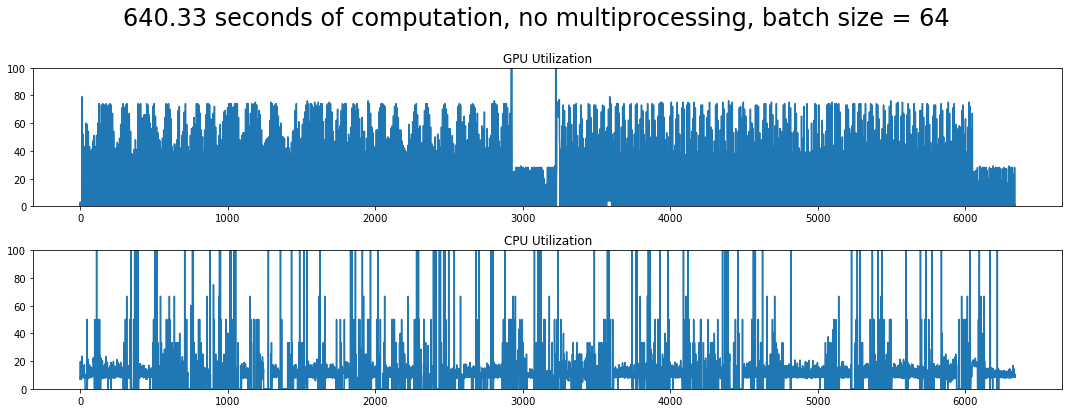

In [53]:
runs.append(run_cat_dog_benchmark(processes=None, batch_size=64))

Found 22778 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.
Epoch 1/2
22778/22778 [==============================] - 90s - loss: 0.5475 - acc: 0.7274 - val_loss: 0.4989 - val_acc: 0.7610
Epoch 2/2
22778/22778 [==============================] - 87s - loss: 0.5318 - acc: 0.7417 - val_loss: 0.4973 - val_acc: 0.7610


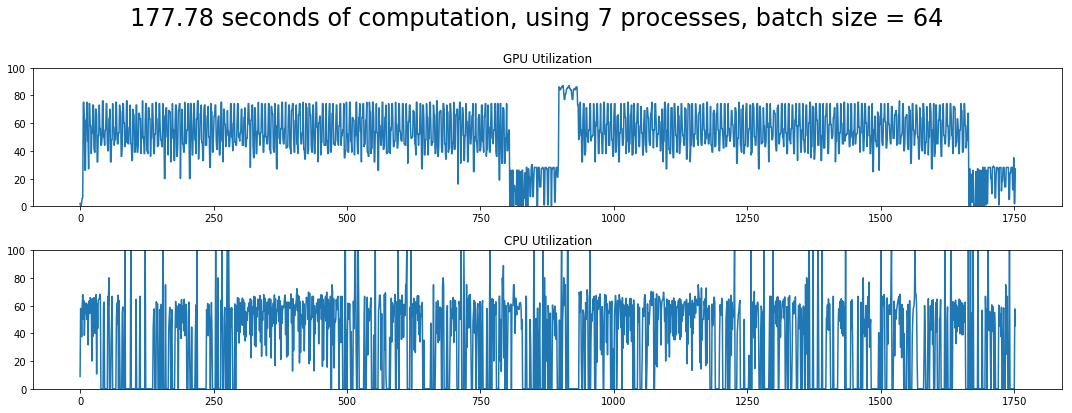

In [54]:
runs.append(run_cat_dog_benchmark(processes=7, batch_size=64))

Found 22778 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.
Epoch 1/2
22778/22778 [==============================] - 81s - loss: 0.5181 - acc: 0.7514 - val_loss: 0.5052 - val_acc: 0.7520
Epoch 2/2
22778/22778 [==============================] - 80s - loss: 0.5086 - acc: 0.7591 - val_loss: 0.4665 - val_acc: 0.7691


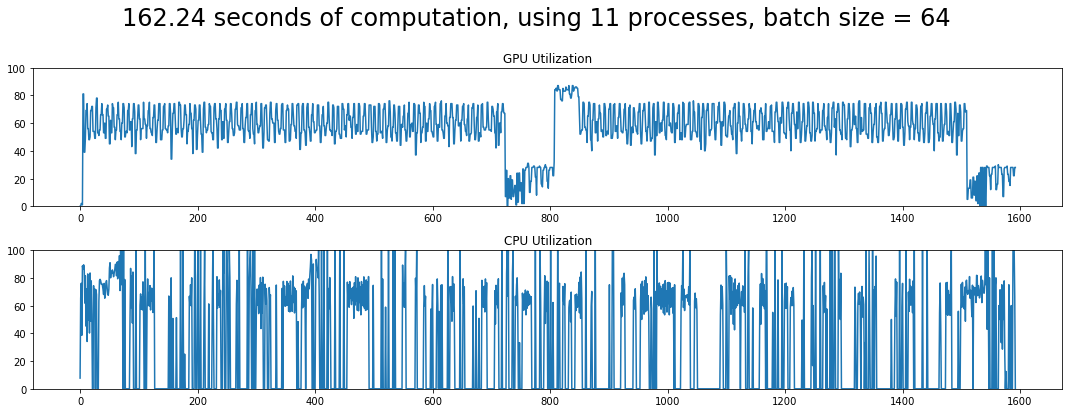

In [55]:
runs.append(run_cat_dog_benchmark(processes=11, batch_size=64))

In [57]:
runs[0]['duration'] / runs[2]['duration']

3.9467718654410233

 3.94x performance over single thread